<a href="https://colab.research.google.com/github/TejasAdsul/ML_Regression/blob/main/Concrete_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context
Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

#Content
Data Characteristics:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

Summary Statistics:

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable

Missing Attribute Values: None

Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [262]:
# Import data from kaggle
from google.colab import files
files.upload()                      # Upload kaggle.json file
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d niteshyadav3103/concrete-compressive-strength
! unzip concrete-compressive-strength.zip

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
concrete-compressive-strength.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  concrete-compressive-strength.zip
replace Concrete Compressive Strength.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [263]:
# Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor

In [264]:
df = pd.read_csv('/content/Concrete Compressive Strength.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [265]:
# Remove extra information from column names
cols = df.columns
new_cols = []
for col in cols:
  col = col.split('(')[0].rstrip().lower().replace(' ','_')
  new_cols.append(col)
df.columns = new_cols
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# Exploratory Data Anaiysis

In [266]:
# Numerical exploration
pd.set_option('display.max_columns', 10)
print('Summary: \n',df.head(),'\n')
print('Shape: \n',df.shape,'\n')
print('Description: \n',df.describe(),'\n')
print('Number of unique values in each column: \n',df.nunique(axis=0),'\n')

Summary: 
    cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age  concrete_compressive_strength  
0            1040.0           676.0   28                      79.986111  
1            1055.0           676.0   28                      61.887366  
2             932.0           594.0  270                      40.269535  
3             932.0           594.0  365                      41.052780  
4             978.4           825.5  360                      44.296075   

Shape: 
 (1030, 9) 

Description: 
             cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.0000

Fly Ash has median value of zero, implying it is majorly absent in concrete

There are only 14 unique age values, but test dataset could have values not mentioned in train dataset

Correlation Heatmap: 



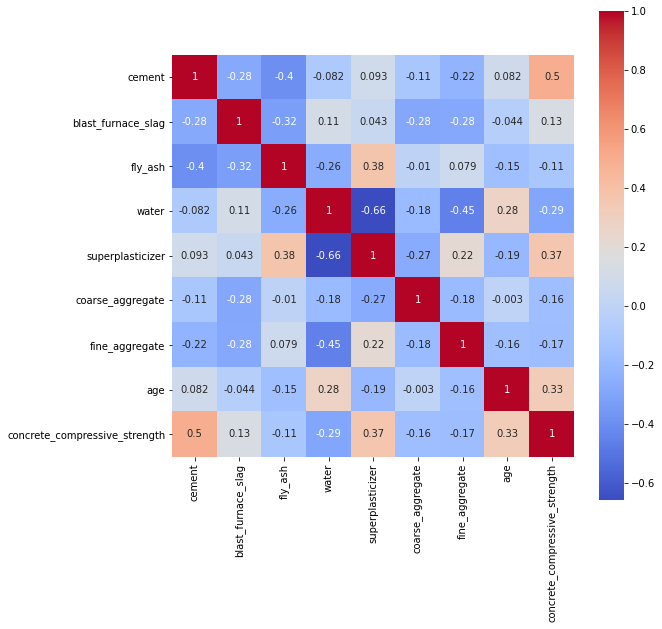


Boxplots: 



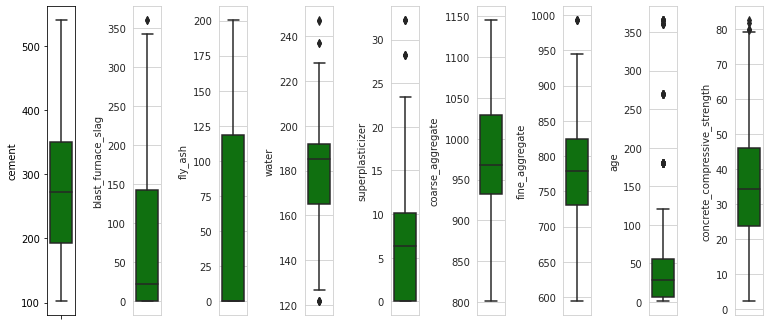


Kernel Density Estimates: 



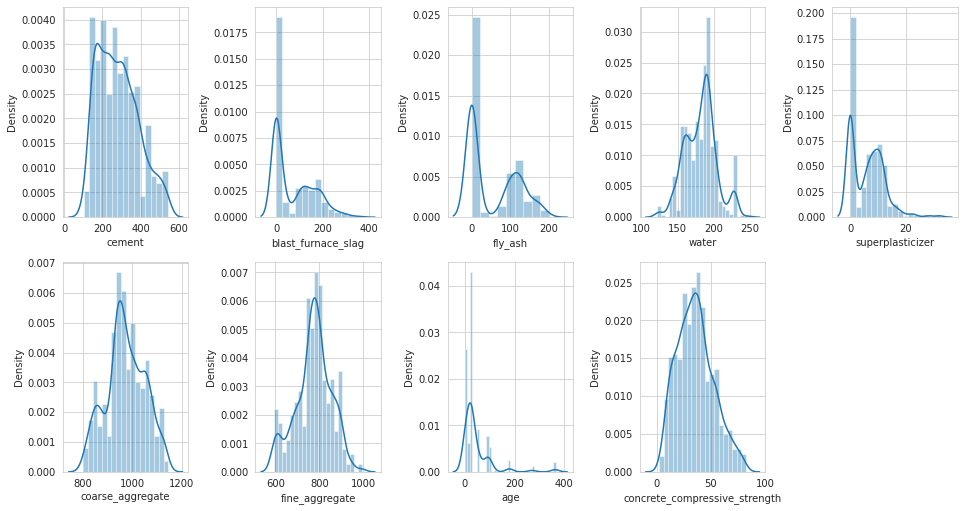


Scatterplots: 



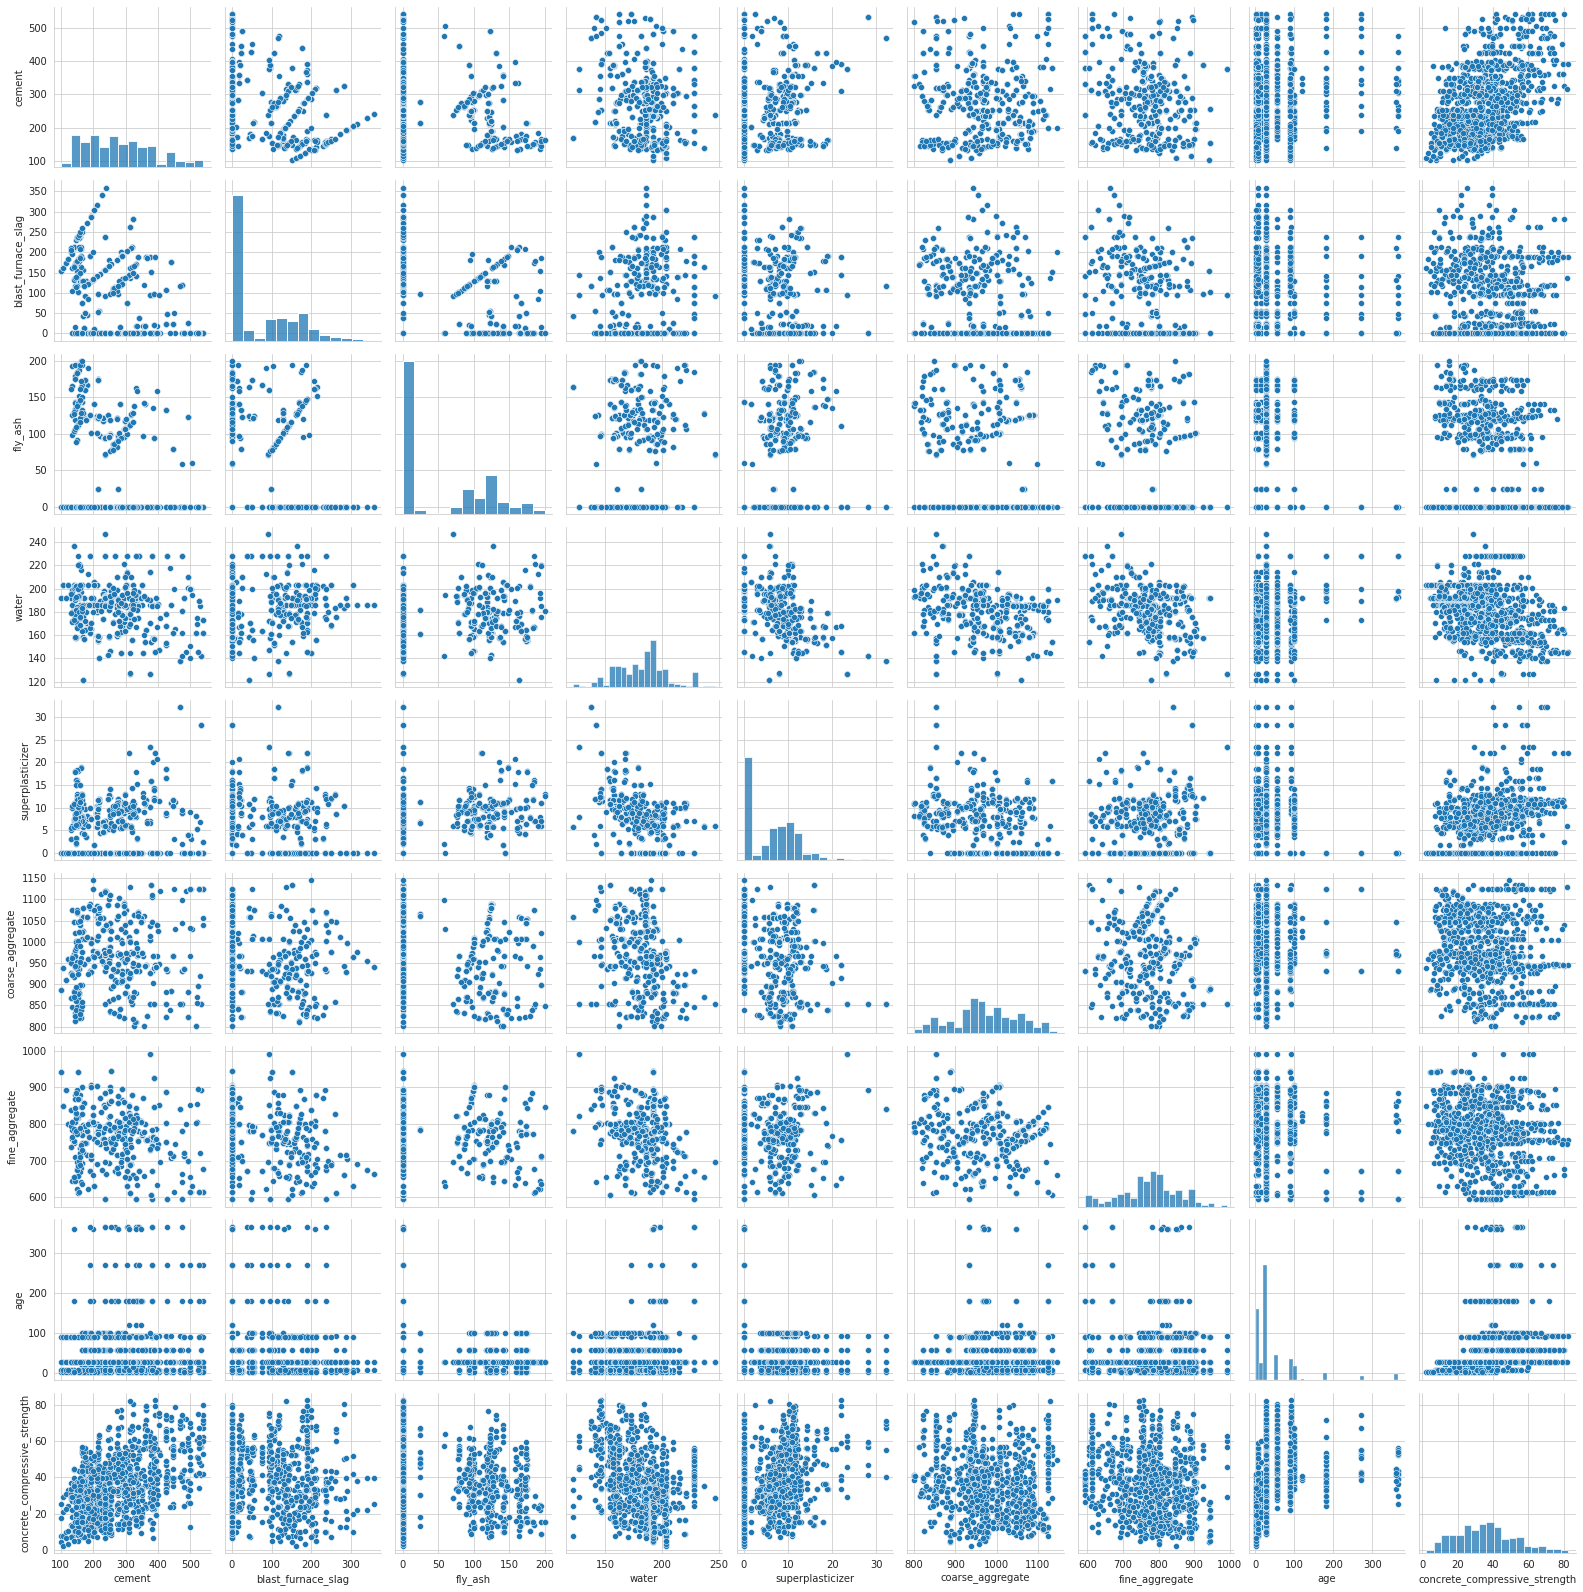

In [267]:
# Graphical exploration

print('Correlation Heatmap: \n')
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,ax=ax,square=True)
plt.show()

l = df.columns.values
number_of_columns=len(df.columns)
number_of_rows = round(len(l)-1/number_of_columns)

print('\nBoxplots: \n')
plt.figure(figsize=(1.2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=df[l[i]],color='green',orient='v')
    plt.tight_layout()
plt.show()
    
print('\nKernel Density Estimates: \n')
plt.figure(figsize=(1.5*number_of_columns,0.8*number_of_rows))
for i in range(len(l)):
    plt.subplot(2,5,i+1)
    sns.distplot(df[l[i]],kde=True)
    plt.tight_layout()
plt.show()
    
print('\nScatterplots: \n')
sns.pairplot(df)
plt.show()

Cement, Blast Furnace Slag, Fly Ash and Superplasticizer are not distributed in a Gaussian form. 

Water and Superplasticizer are highly negatively correlated



# Scaling and PCA

In [268]:
# Separate dataframe into features and labels
X = df.drop(['concrete_compressive_strength'],axis=1)
y = df['concrete_compressive_strength']

In [269]:
# Split data into train, val, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, shuffle=True)
print(len(X_train),len(X_test))

721 309


In [270]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(np.mean(X_train),np.std(X_train))

# Convert standardized array to table
feat_cols = df.columns[:-1]
X_train = pd.DataFrame(X_train,columns=feat_cols)
X_test = pd.DataFrame(X_test,columns=feat_cols)
X_train.head()

2.40984609367319e-17 1.0


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,-0.828635,-0.855292,0.762033,-0.765446,0.224201,0.415550,1.676831,-0.292980
1,0.374843,-0.855292,-0.816902,0.103778,-1.013764,1.136985,0.141922,-0.633845
2,0.317587,1.568944,-0.816902,-1.234582,1.352934,-1.551189,1.358359,-0.698772
3,0.688826,-0.638537,1.397879,-1.314978,0.791878,-0.405305,0.366726,-0.698772
4,-1.130428,1.312260,1.507833,-0.132681,2.130800,-1.730910,-0.382619,-0.292980


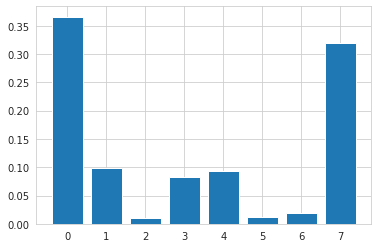

In [271]:
# Feature Selection
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
importances = model.feature_importances_
plt.bar([x for x in range(len(importances))], importances)
plt.show()

Features 0, 1, 3, 4, 7 have the most importance. Thus, they are selected as the features for model training.

In [272]:
X_train = X_train.iloc[:,[0,1,3,4,7]]
X_test = X_test.iloc[:,[0,1,3,4,7]]
X_train.head()

,cement,blast_furnace_slag,water,superplasticizer,age
0,-0.828635,-0.855292,-0.765446,0.224201,-0.292980
1,0.374843,-0.855292,0.103778,-1.013764,-0.633845
2,0.317587,1.568944,-1.234582,1.352934,-0.698772
3,0.688826,-0.638537,-1.314978,0.791878,-0.698772
4,-1.130428,1.312260,-0.132681,2.130800,-0.292980


,princ_comp0,princ_comp1,princ_comp2,princ_comp3,princ_comp4
0,0.695233,-0.097289,-0.458468,1.189559,-0.148707
1,-0.364426,0.723823,-1.224048,0.002959,-0.396550
2,1.829072,-1.198107,0.674546,-1.060944,-0.209225
3,1.788710,0.582303,-0.363462,-0.020571,-0.235885
4,1.238509,-1.932557,0.995136,0.051666,1.175585


Explained variation per principal component: [0.358847   0.26772191 0.17488003 0.13537616 0.0631749 ] 



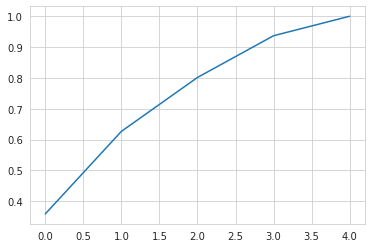

In [273]:
# Principal Component Analysis
pca = PCA()
X_pca = pca.fit_transform(X_train)
X_pca = pd.DataFrame(data = X_pca, columns = ['princ_comp'+str(i) for i in range(X_pca.shape[1])])
display(X_pca.head())
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_),'\n')
plt.plot(np.cumsum(pca.explained_variance_ratio_))

All the principal components are kept for further analysis

,princ_comp0,princ_comp1,princ_comp2,princ_comp3,princ_comp4
0,0.695233,-0.097289,-0.458468,1.189559,-0.148707
1,-0.364426,0.723823,-1.224048,0.002959,-0.396550
2,1.829072,-1.198107,0.674546,-1.060944,-0.209225
3,1.788710,0.582303,-0.363462,-0.020571,-0.235885
4,1.238509,-1.932557,0.995136,0.051666,1.175585


Explained variation per principal component: [0.358847   0.26772191 0.17488003 0.13537616 0.0631749 ] 



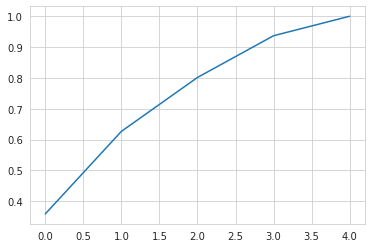

In [274]:
# Principal Component Analysis
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = pd.DataFrame(data = X_train, columns = ['princ_comp'+str(i) for i in range(X_train.shape[1])])
X_test = pd.DataFrame(data = X_test, columns = ['princ_comp'+str(i) for i in range(X_test.shape[1])])

display(X_train.head())
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_),'\n')
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Build Model

In [275]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}\n')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred))}\n')
print(f'R2 Score: {r2_score(y_test, y_pred)}\n')
print(cross_val_score(regressor, X_train, y_train, cv=5, scoring = 'r2').mean(),'\n')
print(cross_val_score(regressor, X_test, y_test, cv=5, scoring = 'r2').mean())

Mean Absolute Error: 8.907708925191603

Root Mean Square Error: 11.026404026406352

R2 Score: 0.5506599203032488

0.5776539948029964 

0.5476240609244898


In [276]:
# Decision Tree Regression
regressor = DecisionTreeRegressor(max_depth=8,random_state=42)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}\n')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred))}\n')
print(f'R2 Score: {r2_score(y_test, y_pred)}\n')
print(cross_val_score(regressor, X_train, y_train, cv=5, scoring = 'r2').mean(),'\n')
print(cross_val_score(regressor, X_test, y_test, cv=5, scoring = 'r2').mean())

Mean Absolute Error: 6.692775509639123

Root Mean Square Error: 9.143187640634169

R2 Score: 0.6910397414786145

0.6877090313381521 

0.5339199324716439


In [277]:
# Random Forest Regression
regressor = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}\n')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred))}\n')
print(f'R2 Score: {r2_score(y_test, y_pred)}\n')
print(cross_val_score(regressor, X_train, y_train, cv=5, scoring = 'r2').mean(),'\n')
print(cross_val_score(regressor, X_test, y_test, cv=5, scoring = 'r2').mean())

Mean Absolute Error: 5.480738181113768

Root Mean Square Error: 7.184776940795149

R2 Score: 0.8092195215475113

0.8288832399885354 

0.7153792731731963


In [278]:
# KNeighbors Regression
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}\n')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred))}\n')
print(f'R2 Score: {r2_score(y_test, y_pred)}\n')
print(cross_val_score(regressor, X_train, y_train, cv=5, scoring = 'r2').mean(),'\n')
print(cross_val_score(regressor, X_test, y_test, cv=5, scoring = 'r2').mean())

Mean Absolute Error: 6.579719577013782

Root Mean Square Error: 8.767964742751975

R2 Score: 0.7158779470135616

0.7537439640146888 

0.6752614585645318


In [279]:
# Support Vector Machine Regression
regressor = svm.SVR(kernel='rbf',gamma=0.01,C=10000)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}\n')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred))}\n')
print(f'R2 Score: {r2_score(y_test, y_pred)}\n')
print(cross_val_score(regressor, X_train, y_train, cv=5, scoring = 'r2').mean(),'\n')
print(cross_val_score(regressor, X_test, y_test, cv=5, scoring = 'r2').mean())

Mean Absolute Error: 5.2946981579924

Root Mean Square Error: 7.067482256590764

R2 Score: 0.8153978272996971

0.8332375864466621 

0.7686937583330186


In [280]:
# Gradient Boosting Regression
regressor = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_depth=3)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}\n')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred))}\n')
print(f'R2 Score: {r2_score(y_test, y_pred)}\n')
print(cross_val_score(regressor, X_train, y_train, cv=5, scoring = 'r2').mean(),'\n')
print(cross_val_score(regressor, X_test, y_test, cv=5, scoring = 'r2').mean())

Mean Absolute Error: 5.549444301246576

Root Mean Square Error: 7.2340275607160445

R2 Score: 0.8065950110792858

0.8148195001208594 

0.7233768296140475


In [281]:
# Extreme Gradient Boosting
regressor = XGBRegressor(learning_rate=0.1)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}\n')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred))}\n')
print(f'R2 Score: {r2_score(y_test, y_pred)}\n')
print(cross_val_score(regressor, X_train, y_train, cv=5, scoring = 'r2').mean(),'\n')
print(cross_val_score(regressor, X_test, y_test, cv=5, scoring = 'r2').mean())

[01:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 5.927868593152153

Root Mean Square Error: 7.6342310835735105

R2 Score: 0.7846038393909207

[01:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8039092881398504 

[01:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav